In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Cell 2: Load dataset
df = pd.read_csv('../data/power_line_data.csv')

print("📊 Dataset Overview:")
print(f"Shape: {df.shape} (rows, columns)")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nFirst 5 rows:")
display(df.head())

print(f"\nData types:")
print(df.dtypes)

print(f"\nMissing values:")
print(df.isnull().sum())

📊 Dataset Overview:
Shape: (86400, 6) (rows, columns)

Column names: ['timestamp', 'current_phase_A', 'voltage_phase_A', 'is_fault', 'power', 'impedance']

First 5 rows:


,timestamp,current_phase_A,voltage_phase_A,is_fault,power,impedance
0,0,102.116233,222.555606,0,22726.540121,2.179413
1,1,93.481381,219.945818,0,20560.838750,2.352805
2,2,102.124741,224.696676,0,22947.089788,2.200196
3,3,99.098726,220.444256,0,21845.744852,2.224469
4,4,97.140924,216.493742,0,21030.402158,2.228633



Data types:
timestamp            int64
current_phase_A    float64
voltage_phase_A    float64
is_fault             int64
power              float64
impedance          float64
dtype: object

Missing values:
timestamp          0
current_phase_A    0
voltage_phase_A    0
is_fault           0
power              0
impedance          0
dtype: int64


📈 Basic Statistics:
          timestamp  current_phase_A  voltage_phase_A      is_fault  \
count  86400.000000     86400.000000     86400.000000  86400.000000   
mean   43199.500000       101.134629       219.434084      0.003993   
std    24941.675966        18.232063        10.443836      0.063065   
min        0.000000        77.375886        13.622152      0.000000   
25%    21599.750000        93.468750       216.705773      0.000000   
50%    43199.500000       100.261498       220.021117      0.000000   
75%    64799.250000       106.771004       223.318981      0.000000   
max    86399.000000       479.805870       232.960715      1.000000   

              power     impedance  
count  86400.000000  86400.000000  
mean   22036.469710      2.203309  
std     1809.693842      0.217874  
min     4734.422101      0.039194  
25%    20568.864158      2.061072  
50%    22038.371733      2.194007  
75%    23464.244415      2.353092  
max    53829.387325      2.887705  

🔴 Fault Statist

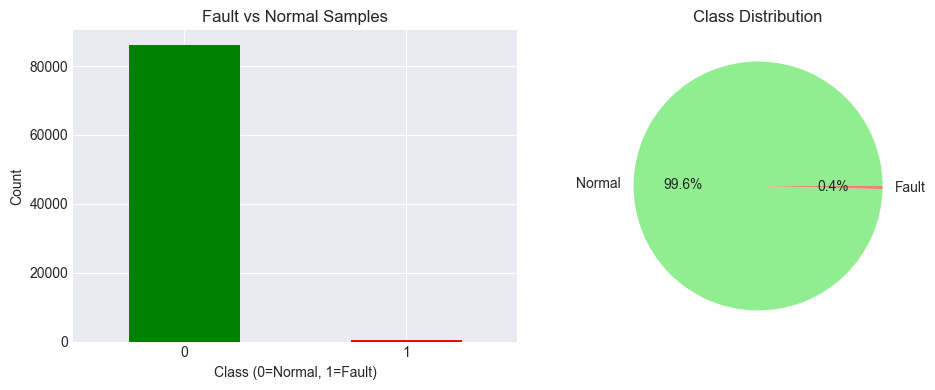

In [3]:

print("📈 Basic Statistics:")
print(df.describe())

print(f"\n🔴 Fault Statistics:")
print(f"Total faults: {df['is_fault'].sum()}")
print(f"Fault percentage: {df['is_fault'].mean()*100:.2f}%")

# Plot class distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
df['is_fault'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Fault vs Normal Samples')
plt.xlabel('Class (0=Normal, 1=Fault)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(df['is_fault'].value_counts(),
        labels=['Normal', 'Fault'],
        autopct='%1.1f%%',
        colors=['lightgreen', 'lightcoral'])
plt.title('Class Distribution')

plt.tight_layout()
plt.show()

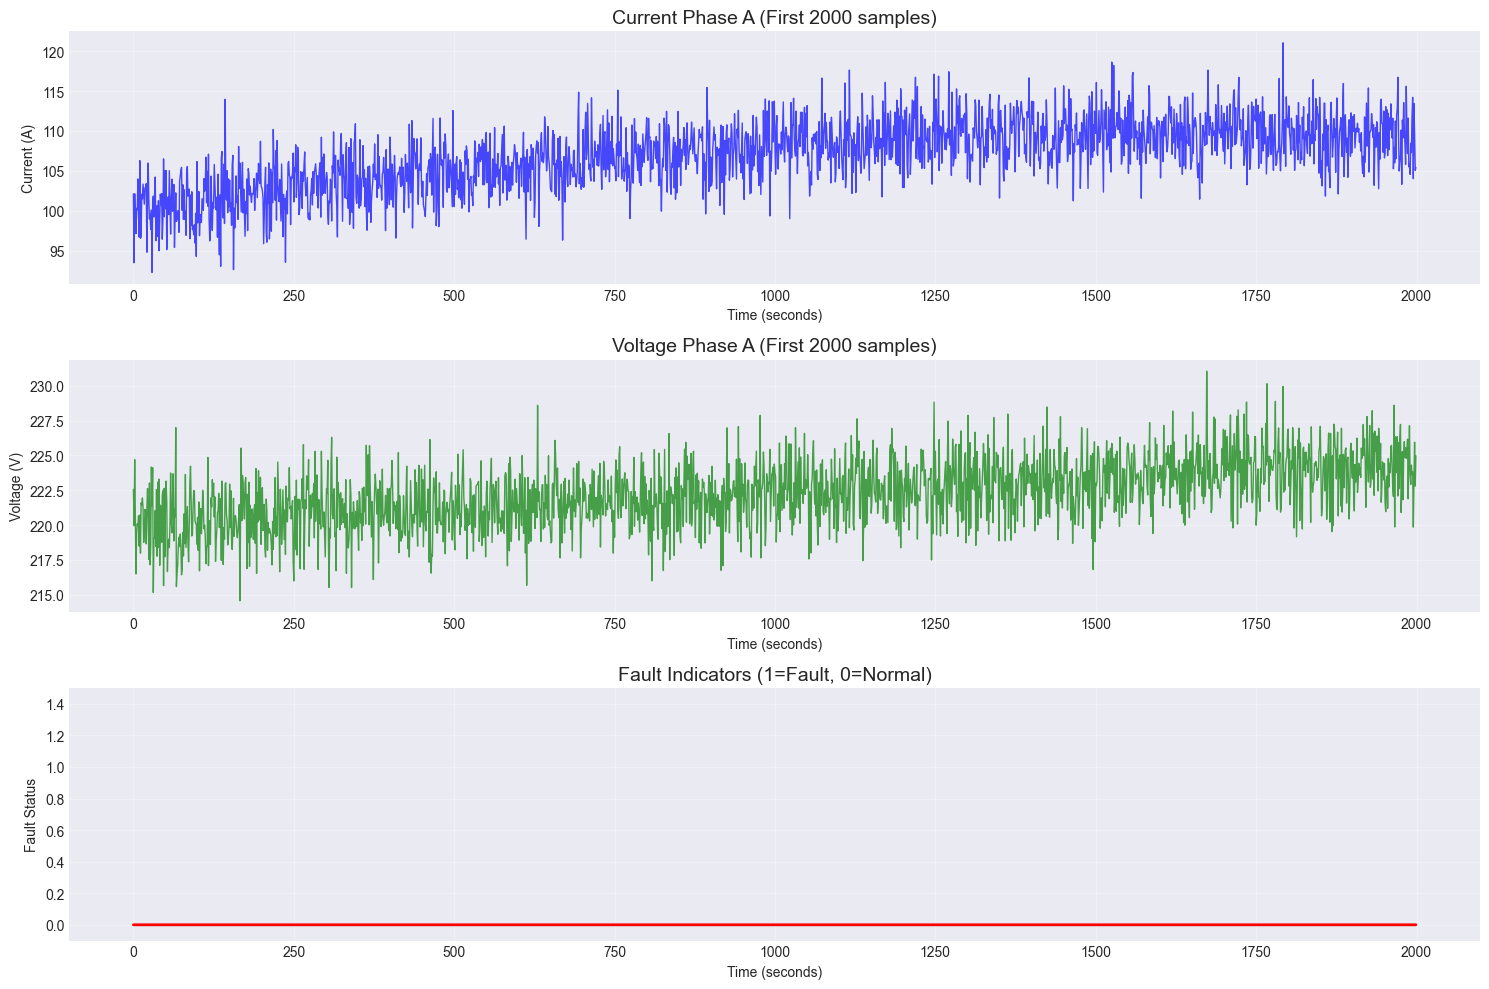

In [4]:
# Cell 4: Visualize power data over time
plt.figure(figsize=(15, 10))

# Plot 1: Current over time
plt.subplot(3, 1, 1)
plt.plot(df['timestamp'][:2000], df['current_phase_A'][:2000], 'b-', linewidth=1, alpha=0.7)
plt.title('Current Phase A (First 2000 samples)', fontsize=14)
plt.xlabel('Time (seconds)')
plt.ylabel('Current (A)')
plt.grid(True, alpha=0.3)

# Highlight fault regions
fault_indices = df.index[df['is_fault'] == 1][:2000]
if len(fault_indices) > 0:
    for idx in fault_indices:
        if idx < 2000:
            plt.axvspan(idx-10, idx+10, alpha=0.3, color='red')

# Plot 2: Voltage over time
plt.subplot(3, 1, 2)
plt.plot(df['timestamp'][:2000], df['voltage_phase_A'][:2000], 'g-', linewidth=1, alpha=0.7)
plt.title('Voltage Phase A (First 2000 samples)', fontsize=14)
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')
plt.grid(True, alpha=0.3)

# Highlight fault regions
for idx in fault_indices:
    if idx < 2000:
        plt.axvspan(idx-10, idx+10, alpha=0.3, color='red')

# Plot 3: Fault regions clearly marked
plt.subplot(3, 1, 3)
plt.plot(df['timestamp'][:2000], df['is_fault'][:2000], 'r-', linewidth=2)
plt.title('Fault Indicators (1=Fault, 0=Normal)', fontsize=14)
plt.xlabel('Time (seconds)')
plt.ylabel('Fault Status')
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.5)

plt.tight_layout()
plt.show()

🔗 Correlation Matrix:


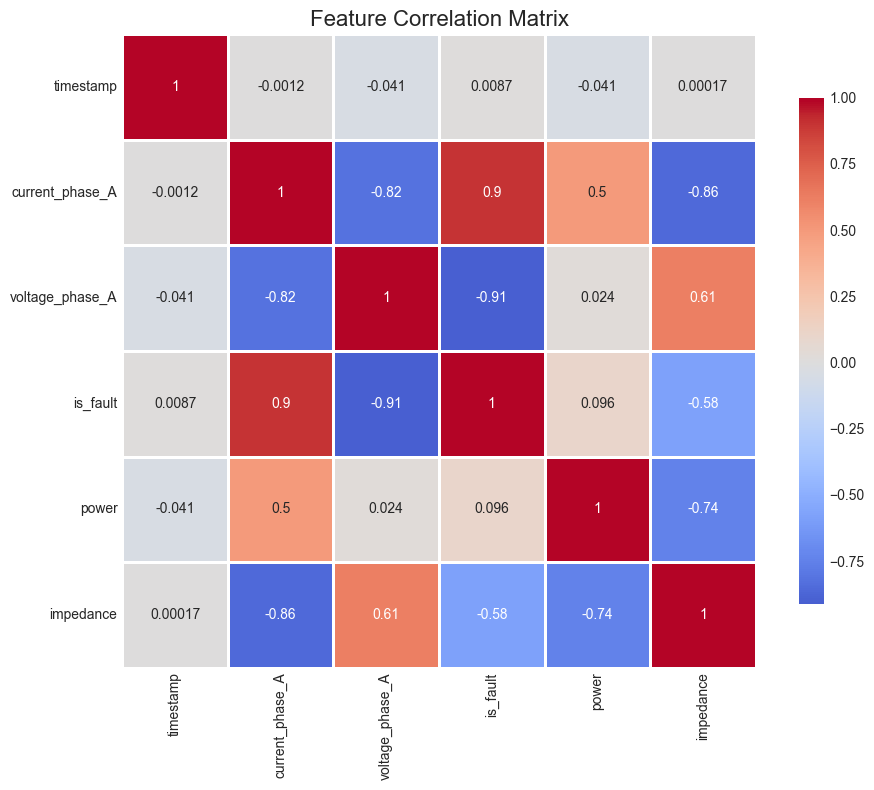


📊 Correlation with 'is_fault':
is_fault           1.000000
current_phase_A    0.895952
power              0.095862
timestamp          0.008676
impedance         -0.584154
voltage_phase_A   -0.913560
Name: is_fault, dtype: float64


In [5]:
# Cell 5: Correlation analysis
print("🔗 Correlation Matrix:")
correlation = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# Show correlation with fault specifically
print("\n📊 Correlation with 'is_fault':")
fault_corr = correlation['is_fault'].sort_values(ascending=False)
print(fault_corr)